**Importing dependecies**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

**----- DATA ANALYSIS AND PRE PROCESSING-----**

**Reading the file and Initial Data Analysis**

In [41]:
dataset = pd.read_csv("Salary_dataset.csv") #reading the dataset

In [42]:
dataset.head(8) #gives 1st 8 rows

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K
7,74,16,0,20,>50K


In [43]:
dataset.shape #gives dimensions of the dataset

(32561, 5)

In [44]:
dataset.describe() #statistical info about the dataset

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [45]:
dataset.info() #other info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [46]:
dataset.isnull().sum() #to check if any null values

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [47]:
dataset["income"].value_counts() #Target feature values frequency (Data imbalance)

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

**Label Encoding from character to Binary**

In [48]:
dataset["Target"] = dataset["income"].apply(lambda x: 1 if x == ">50K" else 0) #Label encoding for the target feature

In [49]:
dataset.head(25) #top 25 columns

,age,education.num,capital.gain,hours.per.week,income,Target
0,90,9,0,40,<=50K,0
1,82,9,0,18,<=50K,0
2,66,10,0,40,<=50K,0
3,54,4,0,40,<=50K,0
4,41,10,0,40,<=50K,0
5,34,9,0,45,<=50K,0
6,38,6,0,40,<=50K,0
7,74,16,0,20,>50K,1
8,68,9,0,40,<=50K,0
9,41,10,0,60,>50K,1


**ADDRESSING DATA IMBALANCE**

**Dividing the class 0 and class 1 sections to perform undersampling and oversampling**

In [50]:
#separating class 0 and class 1

class_0 = dataset[dataset["Target"]==0]
class_1 = dataset[dataset["Target"]==1]

print(class_0.shape)
print(class_1.shape)


(24720, 6)
(7841, 6)


In [51]:
class_0.head()

,age,education.num,capital.gain,hours.per.week,income,Target
0,90,9,0,40,<=50K,0
1,82,9,0,18,<=50K,0
2,66,10,0,40,<=50K,0
3,54,4,0,40,<=50K,0
4,41,10,0,40,<=50K,0


**UNDER SAMPLING**

**Dropping the majority class to moderate frequency**

In [52]:
rows_to_drop = class_0.sample(n=9600, random_state=23) #selecting random 9600 rows
rows_dropped = class_0.drop(rows_to_drop.index) #dropping

print(rows_dropped.shape)
print(class_1.shape)

(15120, 6)
(7841, 6)


**Concatinating both and forming a new dataset**

In [53]:
new_df = pd.concat([rows_dropped, class_1], ignore_index=True) #Concatination

**Analysis of above division and concatination**

In [54]:
print(new_df.shape)

(22961, 6)


In [55]:
new_df.head()

,age,education.num,capital.gain,hours.per.week,income,Target
0,90,9,0,40,<=50K,0
1,82,9,0,18,<=50K,0
2,66,10,0,40,<=50K,0
3,54,4,0,40,<=50K,0
4,41,10,0,40,<=50K,0


**Dropping unwanted features**

In [56]:
new_df = new_df.drop(columns=["income"]) #dropping income feature

In [57]:
new_df.head() #feature dropped

,age,education.num,capital.gain,hours.per.week,Target
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [58]:
new_df["Target"].value_counts() #Class 0 came to moderate range and 1 is up to resample

Target
0    15120
1     7841
Name: count, dtype: int64

**Separating the training features and the target feature**

In [59]:
X = new_df.iloc[:,:-1] ##Separating the 1st 4 features
Y = new_df["Target"] ##Separating the target feature(5th feature)

**Analysis of the above separation**

In [60]:
print(X.shape)
print(Y.shape)


(22961, 4)
(22961,)


In [61]:

print(X)


       age  education.num  capital.gain  hours.per.week
0       90              9             0              40
1       82              9             0              18
2       66             10             0              40
3       54              4             0              40
4       41             10             0              40
...    ...            ...           ...             ...
22956   34             13             0              55
22957   71             16             0              10
22958   39             12             0              20
22959   53             14             0              40
22960   40              9             0              40

[22961 rows x 4 columns]


In [62]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
22956    1
22957    1
22958    1
22959    1
22960    1
Name: Target, Length: 22961, dtype: int64


**----- BUILDING A MODEL -----**

**Splitting the data for training and testing**

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32) #Splitting the data(80% for train, 20% for test)

In [64]:
print(X_train.shape) #finding dimensions of the splitted data
print(X_test.shape)

(18368, 4)
(4593, 4)


In [65]:
print(Y_train.shape) #finding dimensions of the splitted data
print(Y_test.shape)

(18368,)
(4593,)


**OVER SAMPLING**

**Over sampling the monority class (class 1) to reach class 0 frequency**

In [66]:
smote = SMOTE(random_state=54) #initializing smote
X_train_smote, Y_train_smote = smote.fit_resample(X_train,Y_train) #resampling the training data

**Now data is balanced**

In [67]:
print(X_train_smote.shape)
print(Y_train_smote.shape)


(24120, 4)
(24120,)


**Scaling the data with Min-Max Scalar**

In [68]:
mm_scalar = MinMaxScaler() #initalizing minmax scalar
X_train_transformed = mm_scalar.fit_transform(X_train_smote) #fitting & transforming the data into feature vectors
X_test_transformed = mm_scalar.transform(X_test) #transforming the data into feature vectors

**FINDING OPTIMAL K-VALUE VISUALISING AN ELBOW GRAPH**

**Finding the mean error between the data**

In [69]:
Error = [] #initialise an empty list
k_values = list(range(1,40)) #random check of k value till 39

for i in k_values:
    model = KNeighborsClassifier(n_neighbors=i) #looping with k_values
    model.fit(X_train_smote, Y_train_smote) #training the model
    pred_i = model.predict(X_test) #predcition
    Error.append(np.mean(pred_i != Y_test)) #appending the mean error into the empty list

**pointing the error and the actual data on the graph**

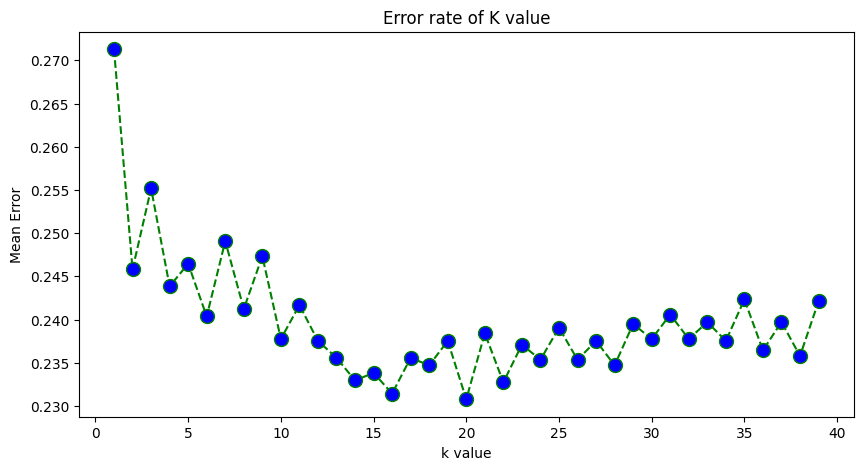

In [70]:
plt.figure(figsize=(10,5)) #intializing a figure of size
plt.plot(k_values, Error, color="green", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10) #plotting k_values, error datapoints
plt.title("Error rate of K value") #Graph title
plt.xlabel("k value") #X label
plt.ylabel("Mean Error") #Y label
plt.show()

**Initializing the model and training it**

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2) #intializing model with metric and Euclidean distance
knn_model.fit(X_train_transformed, Y_train_smote) #Training the model

KNeighborsClassifier(n_neighbors=3)

**Prediction for test data**

In [72]:
Y_pred = knn_model.predict(X_test_transformed) #prediction of test data
Y_pred

array([0, 0, 1, ..., 0, 1, 0], shape=(4593,))

**----- MODEL EVALUATION ----**

**Finding Accuracy on training and test data**

In [73]:
X_train_prediction = knn_model.predict(X_train_transformed)
training_accuracy = accuracy_score(X_train_prediction, Y_train_smote)
print("training accuracy: ", training_accuracy)


training accuracy:  0.775


In [74]:
X_test_prediction = knn_model.predict(X_test_transformed)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.7354670150228608


**Classification Report**

In [75]:
classification_report = classification_report(Y_test, Y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3060
           1       0.60      0.62      0.61      1533

    accuracy                           0.74      4593
   macro avg       0.70      0.71      0.70      4593
weighted avg       0.74      0.74      0.74      4593



**Confusion Matrix**

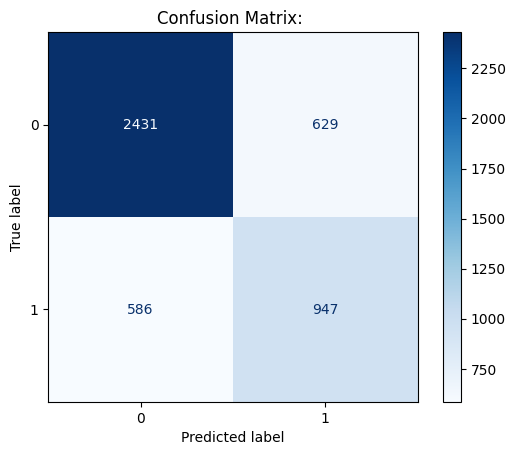

In [76]:
CM = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=[0,1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: ")
plt.show()

**Model Evaluation using manual inputs**

In [79]:
age = int(input("Enter the age: "))
education = int(input("Enter Education: "))
capitalgain = int(input("Enter Captital Gain: "))
workhours = int(input("Enter Hour's Per week: "))
data = [[age,education,capitalgain,workhours]]
pred_i = knn_model.predict(mm_scalar.transform(data))
print(pred_i)

if pred_i == 0:
    print("Person may have less than 50k Salary")
else:
    print("Person can have more than 50k salary")


[0]
Person may have less than 50k Salary


c:\Users\perug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Deep check between test and predicted data (optional)**

In [ ]:
for index, (i,j) in enumerate(zip(Y_test, Y_pred)): #Only 100 datapoints
    if index == 100:
        break #break after 100 iterations
    print(i,j)

0 0
0 0
0 1
0 0
1 1
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 1
1 1
0 0
0 0
0 1
0 0
1 0
0 0
1 1
0 1
0 1
0 0
0 0
1 1
1 0
0 0
0 1
0 0
0 1
1 1
1 0
1 1
1 1
0 0
1 1
0 0
1 1
1 0
1 0
1 0
0 0
0 0
1 1
0 1
0 0
1 1
0 1
0 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 0
0 0
1 1
0 0
0 0
1 0
0 0
1 1
1 0
0 0
1 0
0 1
0 1
1 1
1 1
1 1
0 0
1 0
1 0
0 1
0 1
0 0
0 0
0 1
0 0
0 1
0 0
0 1
0 0
0 0
1 1
1 1
0 0
0 0
1 0


**---- Thank You! ----**